## Machine Learning - Desafío 3, Naive Bayes
#### Gustavo Morales, G10 - 13.Ene.2020, (Lunes Semana 2)

### **Ejercicio 1: Preparar el ambiente de trabajo**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
import glob
import os
import itertools

In [2]:
CWD = os.getcwd()

for name in glob.glob(CWD+'/*'):
    print(name)

/home/gus/learn/courses/dlatam_ds/desafios/m3_w02/desafio_03_Gustavo_Morales.ipynb
/home/gus/learn/courses/dlatam_ds/desafios/m3_w02/dump
/home/gus/learn/courses/dlatam_ds/desafios/m3_w02/dump_plus_pop
/home/gus/learn/courses/dlatam_ds/desafios/m3_w02/Desafio_Naive_Bayes_Eduardo_Lopez.ipynb
/home/gus/learn/courses/dlatam_ds/desafios/m3_w02/02_d_Desafío_-_Naive_Bayes.pdf


In [3]:
route = glob.glob('dump/*.csv')

In [4]:
dfs = []

for fname in route:
    df_aux = pd.read_csv(fname, header=0)
    dfs.append(df_aux)

In [5]:
df = pd.concat(dfs, axis=0, ignore_index=True, sort=True)
df.drop(columns='Unnamed: 0', inplace=True)
df.rename(columns={'0': 'artist', '1': 'genre', '2': 'song', '3': 'lyrics'}, inplace=True)

In [6]:
df.sample(10)

artist   genre                                song  \
3640                  Queen    rock                     Dog With A Bone   
7937        Michael Jackson     pop                 Someone In The Dark   
1258  The Smashing Pumpkins    rock      Rudolph The Red-Nosed Reindeer   
883              Kanye West  hiphop                          Don't Stop   
2079                Incubus    rock                          Zee Deveel   
2419               Megadeth   metal                     Back In The Day   
2571         Britney Spears     pop  Early Mornin' (Jason Nevins Remix)   
3326          Vital Remains   metal                   Disciples Of Hell   
1646            Spice Girls     pop                          2 Become 1   
4329              The Doors    rock                          Summertime   

                                                 lyrics  
3640  Hey, you say you won't you can't give me any m...  
7937  All alone wishing on stars \n Waiting for you ...  
1258  Anything we should know about your change? \n ...  
883   Pharrell: \n Explain yourself, how you sound l...  
2079  Nice car, where'd you get your ride? \n A trop...  
2419  Where were you when it happened? \n Where coul...  
2571  Early mornin' \n All right, I was out real lat...  
3326  In the darkness, they will gather \n Conjuring...  
1646  Melanie C: \n Candlelight and soul forever \n ...  
4329  Summertime \n The livin' is easy \n Fish are j...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9489 entries, 0 to 9488
Data columns (total 4 columns):
artist    9489 non-null object
genre     9489 non-null object
song      9489 non-null object
lyrics    9489 non-null object
dtypes: object(4)
memory usage: 296.7+ KB


In [8]:
df.isnull().sum(axis = 0)  # NaN distribution columnwise

artist    0
genre     0
song      0
lyrics    0
dtype: int64

### **Ejercicio 2: Descripción de los datos**

##### ($2.1$) Cantidad de canciones registradas por cada artista en orden decreciente:

In [9]:
df['artist'].value_counts().rename_axis('artist').reset_index(name='counts')

artist  counts
0              Eminem     493
1   Bruce Springsteen     467
2           Bob Dylan     447
3      Britney Spears     323
4         Nicki Minaj     282
..                ...     ...
56           Dua Lipa      29
57              Lorde      27
58         Black Star      23
59          Gorgoroth      16
60       Necrophagist      16

[61 rows x 2 columns]

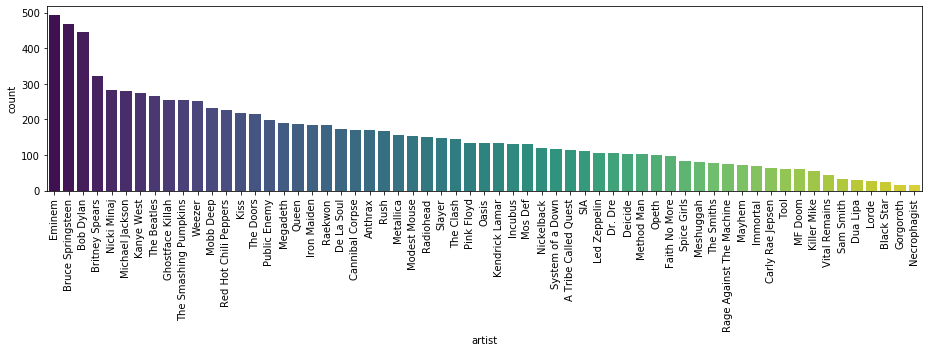

In [10]:
plt.figure(figsize=(13,5))
chart = sns.countplot(data=df, x='artist', order = df['artist'].value_counts().index, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.tight_layout()

##### $(2.2)$ Cantidad de canciones registradas por cada género en orden decreciente:

In [11]:
df['genre'].value_counts().rename_axis('genre').reset_index(name='counts')

genre  counts
0    rock    4140
1  hiphop    2535
2   metal    1582
3     pop    1232

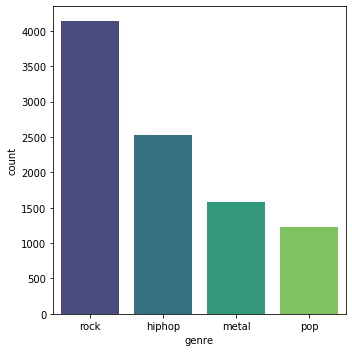

In [12]:
plt.figure(figsize=(5,5))
chart = sns.countplot(data=df, x='genre', order = df['genre'].value_counts().index, palette='viridis')
plt.tight_layout()

##### $(2.3)$ Principales tendencias:

**(R)** De acuerdo a $(2.1)$, el top 5 de artistas con más canciones es:

In [13]:
df['artist'].value_counts().head(5)

Eminem               493
Bruce Springsteen    467
Bob Dylan            447
Britney Spears       323
Nicki Minaj          282
Name: artist, dtype: int64

Y de acuerdo a $(2.2)$, el género más prolífero es el **rock**, seguido del **hiphop**.

### **Ejercicio 3: Matriz de ocurrencias**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

**(R)** En análisis computacional de textos, un _token_ es una unidad funcional de texto que generaliza el concepto de palabras (típicamente separados por espacios). `CountVectorizer` convierte una colección de documentos de texto a una matriz de cuentas de _tokens_, proveyendo una manera de _tokenizar_ dicha colección construyendo un vocabulario de palabras conocidas, a la vez que permite codificar nuevos documentos usando dicho vocabulario.

In [15]:
def top100_words(dataframe, genre=None):
    df_ = dataframe
    if genre!=None:
        df_ = dataframe[dataframe['genre'] == genre]
    count_vectorizer = CountVectorizer(stop_words = 'english')
    count_vectorizer_fit = count_vectorizer.fit_transform(df_['lyrics'])
    words = count_vectorizer.get_feature_names()
    words_freq = count_vectorizer_fit.toarray().sum(axis = 0)
    df__ = pd.DataFrame({'words':words, 'frequency':words_freq})
    print(genre) if genre!=None else print('')
    print(df__.sort_values('frequency', ascending = False).head(100))

**(R)** Las 100 palabras mas repetidas en canciones en todo el data set:

In [16]:
top100_words(df)


       words  frequency
24950   like      19629
12859    don      17398
23856   know      14962
18439    got      14171
23287   just      13978
...      ...        ...
11041  death       1897
24615   left       1895
43442  thing       1882
14305    end       1829
41068   stay       1828

[100 rows x 2 columns]


**(R)** Las 100 palabras mas repetidas por género:

In [17]:
genres =  ['rock', 'hiphop', 'metal', 'pop']
for genre in genres:
    top100_words(df, genre=genre)
    print('------------------------')

rock
       words  frequency
5282     don       5284
10362   love       5114
9697    know       4702
12077     oh       4258
20056   yeah       4157
...      ...        ...
18247   town        558
6337    fall        548
14819  round        548
4527    days        542
10335   lost        541

[100 rows x 2 columns]
------------------------
hiphop
        words  frequency
18361    like      12055
13533     got       7613
9466      don       7604
17532    know       6535
17082    just       6272
...       ...        ...
31521    talk        823
18961      ma        821
34088   verse        820
5866   chorus        811
3911     bout        808

[100 rows x 2 columns]
------------------------
metal
       words  frequency
7883    life       1233
4088     don       1181
3284   death       1139
13844   time       1096
7977      ll       1069
...      ...        ...
13839   till        215
5939    good        214
11666   save        213
13041   stop        211
8034    lord        210

[100 ro

**(R)**
- Palabras como `don` (provenientes de `don't`) tienden a ser independientes del género.
- Palabras como `love` y `like` tienden a repetirse mucho, excepto en el metal.
- En este último, naturalmente las palabras más repetidas son `life`, `death`, `lord`, etc.

#### **Ejercicio 4: Entrenamiento del Modelo**

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [19]:
X = df['lyrics']
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [20]:
pipeline = Pipeline(
    [
        ('cvect', CountVectorizer(stop_words = 'english')),
        ('mnbay', MultinomialNB())
    ]
)

In [21]:
pipeline.fit(X_train, y_train);
# pipeline.named_steps.countvect.get_feature_names()

In [22]:
to_predict = pd.Series(np.array(
    ["I got a place in the underworld",
     "As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara", 
     "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie",
     "Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way",
     "Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates",
     "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving"
    ]))

In [23]:
pipeline.predict(to_predict)

array(['rock', 'metal', 'rock', 'pop', 'metal', 'rock'], dtype='<U6')

**(R)** Contraste con la predicción: la predicción es regular; 2 de 6 correctas. `Pop` en general da problemas.

| Artist       | my prediction     | Google says |
|--------------|-------------------|-------------|
| Broddy Dale  | Rock              | Rock        |
| Gorguts      | Metal             | Metal       |
| N'SYNC       | Rock              | Pop         |
| Ludacris     | Pop               | Hiphop      |
| IDLES        | Metal             | Rock        |
| Banks        | Rock              | Pop         |

In [24]:
y_prediction = pipeline.predict(X_test)

In [25]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

      hiphop       0.85      0.93      0.89      1003
       metal       0.83      0.69      0.75       645
         pop       0.64      0.37      0.47       461
        rock       0.77      0.86      0.81      1687

    accuracy                           0.79      3796
   macro avg       0.77      0.71      0.73      3796
weighted avg       0.78      0.79      0.78      3796



In [26]:
classifier = pipeline.fit(X_train, y_train)

In [27]:
def plot_confusion_matrix(cm,
                          target_names = ['1', '2', '3', '4'],
                          title = 'Confusion matrix',
                          cmap = None,
                          normalize = False):
    # plt.rcParams["axes.grid"] = False

    accuracy = np.trace(cm) / float(np.sum(cm))

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize = (8, 6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    # plt.grid(None)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}'.format(accuracy))

In [28]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_prediction)

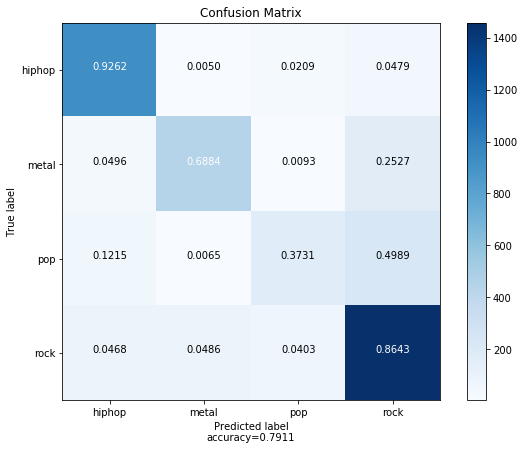

In [29]:
plot_confusion_matrix(cm           = (confusion), 
                      normalize    = True,
                      target_names = ['hiphop', 'metal', 'pop', 'rock'],
                      title        = 'Confusion Matrix')

#### **Ejercicio 5: Mejora del Modelo**

In [30]:
route2 = glob.glob('dump_plus_pop/*.csv')

In [31]:
dfs2 = []

for fname in route2:
    df_aux = pd.read_csv(fname, header=0)
    dfs2.append(df_aux)

In [32]:
df2 = pd.concat(dfs2, axis=0, ignore_index=True, sort=True)
df2.drop(columns='Unnamed: 0', inplace=True)
df2.rename(columns={'0': 'artist', '1': 'genre', '2': 'song', '3': 'lyrics'}, inplace=True)
df2.sample(10)

artist   genre                   song  \
4209      George Michael     pop  This Is Not Real Love   
6789             Raekwon  hiphop           Belt Holders   
563           Black Star  hiphop          Talkin To You   
9935         Frank Ocean     pop       Strawberry Swing   
2159              Weezer    rock          The Good Life   
3253   Bruce Springsteen    rock   Wreck On The Highway   
7600              Eminem  hiphop              Remind Me   
9971         Frank Ocean     pop                 Nights   
10271              Opeth   metal               Madrigal   
6116         Nicki Minaj     pop            Out My Face   

                                                  lyrics  
4209   [George:] \n Don't kiss me, darling \n I want ...  
6789   (Intro: Ghostface Killah) \n Yeah, uh-huh, yo,...  
563    (Mos Def: talking behind singing vocals) \n It...  
9935   When we were kids, we handpainted strawberries...  
2159   Unfortunately, we are not licensed to display ...  
3253   Last night I was out driving \n Coming home at...  
7600   Yo \n I bust in, devilish grin, disgustin' \n ...  
9971   Round the city, round the clock \n Everybody n...  
10271  Our abode 'mongst the stars is waiting, \n Lon...  
6116   Yo, Mariah, \n I was in them million dollar me...

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10804 entries, 0 to 10803
Data columns (total 4 columns):
artist    10804 non-null object
genre     10804 non-null object
song      10804 non-null object
lyrics    10804 non-null object
dtypes: object(4)
memory usage: 337.8+ KB


In [34]:
df2.isnull().sum(axis = 0)  # NaN distribution columnwise

artist    0
genre     0
song      0
lyrics    0
dtype: int64

In [35]:
X2 = df2['lyrics']
y2 = df2['genre']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .4, random_state = 42)

In [36]:
pipeline2 = Pipeline(
    [
        ('cvect2', CountVectorizer(stop_words = 'english')),
        ('mnbay2', MultinomialNB())
    ]
)

In [37]:
pipeline2.fit(X2_train, y2_train);

In [38]:
pipeline2.predict(to_predict)

array(['rock', 'metal', 'pop', 'pop', 'metal', 'pop'], dtype='<U6')

**(R)** Contraste con la predicción: Mejora bastante con 4 de 6 correctas, con el resto bastante cercano.

| Artist       | my 2nd prediction     | Google says |
|--------------|-------------------|-------------|
| Broddy Dale  | Rock              | Rock        |
| Gorguts      | Metal             | Metal       |
| N'SYNC       | Pop               | Pop         |
| Ludacris     | Pop               | Hiphop      |
| IDLES        | Metal             | Rock        |
| Banks        | Pop               | Pop         |

In [39]:
y2_prediction = pipeline2.predict(X2_test)

In [40]:
print(classification_report(y2_test, y2_prediction))

              precision    recall  f1-score   support

      hiphop       0.85      0.90      0.87      1029
       metal       0.81      0.69      0.75       621
         pop       0.68      0.68      0.68      1012
        rock       0.75      0.76      0.75      1660

    accuracy                           0.76      4322
   macro avg       0.77      0.76      0.76      4322
weighted avg       0.76      0.76      0.76      4322



In [41]:
confusion2 = confusion_matrix(y2_test, y2_prediction)

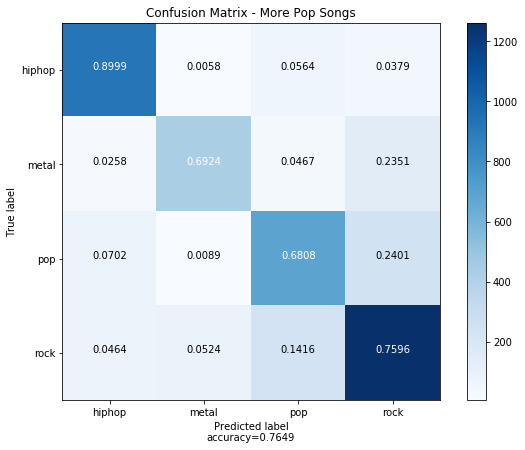

In [42]:
plot_confusion_matrix(cm           = (confusion2), 
                      normalize    = True,
                      target_names = ['hiphop', 'metal', 'pop', 'rock'],
                      title        = 'Confusion Matrix - More Pop Songs')

**(R)** En general mejoraron las métricas y las clasificaciones correctas - especialmente para `Pop` - cuyo F1 score subió significativamente. Esto demuestra lo relevante que es tener más datos para cada clase.